Enter the file: game.png


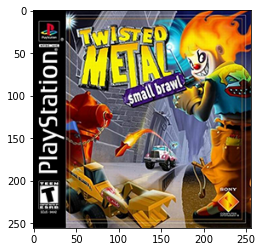

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Input filename
fileName = input("Enter the file: ")

# Open image file
image = Image.open (fileName)

img1d = np.array(image)
plt.imshow(img1d)
(h,w,c) = img1d.shape
img1d = np.reshape (img1d, [h*w,c])

In [2]:
def euclidean(point, data):
    return [np.linalg.norm(point - pixel) for pixel in data]

In [3]:
def kmeans (img1d, k_clusters, max_iter, init_centroids):

    centroids = []
    # Random color pixel in range [0,255]
    if init_centroids == 'random':
        centroids = [[np.random.randint(255), np.random.randint(255), np.random.randint(255)] for _ in range (k_clusters)]
    # Random pixel
    if init_centroids == 'in_pixels':
        centroids = [ img1d[np.random.randint(len(img1d))] for _ in range(k_clusters)]

    
    iteration = 0
    prev_centroids = 0
    
    while np.not_equal (centroids, prev_centroids).any() and iteration < max_iter:
        sorted_points = [[] for _ in range (k_clusters)]
        for pixel in img1d:
            dist = euclidean (pixel, centroids)
            centroid_idx = np.argmin (dist)
            sorted_points[centroid_idx].append(pixel)
            
        prev_centroids = centroids
        centroids = [np.mean(cluster, axis = 0) for cluster in sorted_points]
        
        for i, centroid in enumerate (centroids):
            if np.isnan(centroid).any(): # Check if any centroid is not a number (nan) then we assign the previous centroid
                centroids[i] = prev_centroids[i] # to it
        iteration += 1
    
    centroids = np.array(centroids).astype(int)
    
    labels = []
    for i,pixel in enumerate (img1d):
        dist = euclidean (pixel, centroids)
        centroid_idx = np.argmin (dist)
        labels.append(centroid_idx)
        img1d[i] = centroids[centroid_idx]
    
    return centroids, labels, img1d
    
    

In [4]:
(centroids, labels, img1d) = kmeans(img1d, 3, 5, 'random')

C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


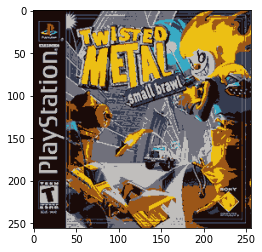

In [5]:
image = np.reshape (img1d, [h,w,c])
plt.imshow(image)

In [6]:
format = input ("Please enter format to export:")
if format == "png":
    plt.imsave('result.png',image)
if format == "pdf":
    plt.imsave('result.pdf',image)
if format == "jpg":
    plt.imsave('result.jpg',image)

Please enter format to export:jpg
